In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

In [2]:
df1 = pd.read_csv("creditcard.csv")

In [3]:
df1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df1.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
df1.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [10]:
df1['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# Now Balance the data 

In [11]:
len(df1)

284807

In [12]:
len(df1[df1['Class'] == 0])

284315

In [13]:
len(df1[df1['Class'] == 1])

492

In [14]:
legit = df1[df1.Class ==0]

In [15]:
fraud = df1[df1.Class == 1]

In [16]:
legit.shape

(284315, 31)

In [17]:
fraud.shape

(492, 31)

In [18]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [19]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [20]:
df1.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
type(fraud)

pandas.core.frame.DataFrame

Now balance the data

In [22]:
legit_sample = legit.sample(n=len(fraud))

In [23]:
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131858,79764.0,-1.207300,-1.565170,-0.364418,-2.388347,0.434000,0.264734,-0.653991,0.597856,-2.507960,...,0.101930,0.098285,0.017061,-1.709314,-0.242622,-0.229493,0.048441,-0.074656,114.97,0
253625,156336.0,-0.956471,0.848386,-0.310154,-2.572560,0.220677,-0.355532,-0.052855,-3.024000,-0.508800,...,2.149743,-0.325552,0.172870,0.709234,-0.292342,0.840010,-0.902100,-0.634324,2.98,0
156501,108250.0,-0.527241,0.849251,2.579009,-0.021781,-0.039523,-0.506016,0.537282,-0.284966,1.463304,...,-0.274920,-0.322205,-0.249124,0.300926,0.199551,-0.750880,-0.074982,-0.141810,2.12,0
170343,120136.0,1.032348,-1.760274,-1.117882,1.693085,-0.712257,0.249279,0.149483,0.008169,0.860860,...,0.546636,0.783909,-0.449943,-0.365566,0.036958,-0.428961,-0.045496,0.023873,472.66,0
97559,66271.0,-1.687116,-5.670578,-0.607569,0.179061,-2.690029,1.103122,0.869336,-0.059392,2.684057,...,0.755213,-0.577907,-1.442587,-0.289578,-0.013906,-0.018400,-0.184221,0.276455,1500.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93597,64502.0,-0.584279,1.187746,1.744336,1.398266,0.992673,0.380856,0.789707,0.040127,-1.032323,...,-0.231866,-0.556243,-0.224333,-0.641371,0.041031,-0.292725,0.107075,0.125118,0.76,0
76726,56715.0,1.316899,0.385192,-0.030257,0.488942,0.101483,-0.575963,0.116494,-0.190388,-0.017726,...,-0.334920,-0.925957,0.017457,-0.476218,0.352419,0.144146,-0.019425,0.023751,1.29,0
70495,53892.0,-0.671520,1.042521,-0.684878,-0.250556,2.401677,3.394550,-0.173742,1.223370,-0.884209,...,0.154237,0.202469,-0.065631,1.005166,-0.066654,-0.325916,-0.070815,0.081896,1.56,0
89636,62661.0,-0.425245,0.092716,1.343646,-1.745254,-0.151145,-0.567509,0.229949,0.056792,-1.688937,...,-0.168089,-0.083982,0.002084,0.239722,-0.615148,0.816498,0.063236,0.124680,4.07,0


In [24]:
df2 = pd.concat([legit_sample,fraud], axis=0)

In [25]:
df2

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131858,79764.0,-1.207300,-1.565170,-0.364418,-2.388347,0.434000,0.264734,-0.653991,0.597856,-2.507960,...,0.101930,0.098285,0.017061,-1.709314,-0.242622,-0.229493,0.048441,-0.074656,114.97,0
253625,156336.0,-0.956471,0.848386,-0.310154,-2.572560,0.220677,-0.355532,-0.052855,-3.024000,-0.508800,...,2.149743,-0.325552,0.172870,0.709234,-0.292342,0.840010,-0.902100,-0.634324,2.98,0
156501,108250.0,-0.527241,0.849251,2.579009,-0.021781,-0.039523,-0.506016,0.537282,-0.284966,1.463304,...,-0.274920,-0.322205,-0.249124,0.300926,0.199551,-0.750880,-0.074982,-0.141810,2.12,0
170343,120136.0,1.032348,-1.760274,-1.117882,1.693085,-0.712257,0.249279,0.149483,0.008169,0.860860,...,0.546636,0.783909,-0.449943,-0.365566,0.036958,-0.428961,-0.045496,0.023873,472.66,0
97559,66271.0,-1.687116,-5.670578,-0.607569,0.179061,-2.690029,1.103122,0.869336,-0.059392,2.684057,...,0.755213,-0.577907,-1.442587,-0.289578,-0.013906,-0.018400,-0.184221,0.276455,1500.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [26]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
131858,79764.0,-1.207300,-1.565170,-0.364418,-2.388347,0.434000,0.264734,-0.653991,0.597856,-2.507960,...,0.101930,0.098285,0.017061,-1.709314,-0.242622,-0.229493,0.048441,-0.074656,114.97,0
253625,156336.0,-0.956471,0.848386,-0.310154,-2.572560,0.220677,-0.355532,-0.052855,-3.024000,-0.508800,...,2.149743,-0.325552,0.172870,0.709234,-0.292342,0.840010,-0.902100,-0.634324,2.98,0
156501,108250.0,-0.527241,0.849251,2.579009,-0.021781,-0.039523,-0.506016,0.537282,-0.284966,1.463304,...,-0.274920,-0.322205,-0.249124,0.300926,0.199551,-0.750880,-0.074982,-0.141810,2.12,0
170343,120136.0,1.032348,-1.760274,-1.117882,1.693085,-0.712257,0.249279,0.149483,0.008169,0.860860,...,0.546636,0.783909,-0.449943,-0.365566,0.036958,-0.428961,-0.045496,0.023873,472.66,0
97559,66271.0,-1.687116,-5.670578,-0.607569,0.179061,-2.690029,1.103122,0.869336,-0.059392,2.684057,...,0.755213,-0.577907,-1.442587,-0.289578,-0.013906,-0.018400,-0.184221,0.276455,1500.00,0


In [27]:
df2.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,90512.640244,-0.119828,0.029137,0.056649,-0.093094,-0.094803,-0.100789,-0.132327,-0.024443,-0.047999,...,-0.014131,-0.051139,0.011580,-0.007509,0.012329,-0.000814,-0.001305,0.017251,0.004854,77.636138
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
df2['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [29]:
x = df2.drop("Class",axis='columns')
y = df2['Class']

In [30]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
131858,79764.0,-1.207300,-1.565170,-0.364418,-2.388347,0.434000,0.264734,-0.653991,0.597856,-2.507960,...,0.034526,0.101930,0.098285,0.017061,-1.709314,-0.242622,-0.229493,0.048441,-0.074656,114.97
253625,156336.0,-0.956471,0.848386,-0.310154,-2.572560,0.220677,-0.355532,-0.052855,-3.024000,-0.508800,...,-0.891758,2.149743,-0.325552,0.172870,0.709234,-0.292342,0.840010,-0.902100,-0.634324,2.98
156501,108250.0,-0.527241,0.849251,2.579009,-0.021781,-0.039523,-0.506016,0.537282,-0.284966,1.463304,...,0.050045,-0.274920,-0.322205,-0.249124,0.300926,0.199551,-0.750880,-0.074982,-0.141810,2.12
170343,120136.0,1.032348,-1.760274,-1.117882,1.693085,-0.712257,0.249279,0.149483,0.008169,0.860860,...,0.642433,0.546636,0.783909,-0.449943,-0.365566,0.036958,-0.428961,-0.045496,0.023873,472.66
97559,66271.0,-1.687116,-5.670578,-0.607569,0.179061,-2.690029,1.103122,0.869336,-0.059392,2.684057,...,2.919597,0.755213,-0.577907,-1.442587,-0.289578,-0.013906,-0.018400,-0.184221,0.276455,1500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00


In [31]:
y

131858    0
253625    0
156501    0
170343    0
97559     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [33]:
len(x_train)

787

In [34]:
len(x_test)

197

In [35]:
x_train.shape

(787, 30)

In [36]:
y_train

100623    1
62879     0
119539    0
80592     0
268601    0
         ..
173771    0
35313     0
223618    1
43061     1
42797     0
Name: Class, Length: 787, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logi = LogisticRegression()

In [39]:
history = logi.fit(x_train,y_train)

In [40]:
history.predict(x_test)

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0],
      dtype=int64)

In [41]:
y_test

247995    1
76726     0
137104    0
79781     0
15451     1
         ..
108258    1
12108     1
99506     1
74496     1
70970     0
Name: Class, Length: 197, dtype: int64

In [42]:
logi.score(x_train,y_train)

0.9491740787801779

In [43]:
logi.score(x_test,y_test)

0.9390862944162437

In [44]:
history.coef_

array([[-2.88883356e-05,  3.41199371e-02, -1.72633708e-01,
        -5.84619115e-01,  7.82082958e-01,  4.42634501e-01,
        -3.36436710e-01,  1.07118708e-01, -2.79351750e-01,
        -3.44806434e-01, -4.15644256e-01,  2.62519926e-01,
        -4.25876137e-01, -1.95667770e-01, -9.75408933e-01,
        -1.41554330e-01, -3.22691609e-01, -4.34424457e-01,
         7.84717473e-02,  1.11229281e-02, -7.68174406e-02,
         9.56546543e-02,  1.35473832e-01, -7.45110699e-02,
         4.27103814e-02, -1.78897904e-01, -7.52865899e-02,
         1.59411189e-02,  1.16668676e-02,  1.40978727e-03]])

In [45]:
history.intercept_

array([-0.42525454])

In [46]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

In [47]:
y_pred = history.predict(x_test)

In [48]:
precision_score(y_test,y_pred)

0.9574468085106383

In [49]:
from sklearn.metrics import classification_report

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        99
           1       0.96      0.92      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [51]:
y_train[:10]

100623    1
62879     0
119539    0
80592     0
268601    0
133983    0
137544    0
154454    1
79853     0
102445    1
Name: Class, dtype: int64

In [52]:
y_test[:10]

247995    1
76726     0
137104    0
79781     0
15451     1
164619    0
10204     1
151011    1
82874     0
42784     1
Name: Class, dtype: int64

In [55]:
y_test

247995    1
76726     0
137104    0
79781     0
15451     1
         ..
108258    1
12108     1
99506     1
74496     1
70970     0
Name: Class, Length: 197, dtype: int64

In [56]:
cm = confusion_matrix(y_test,y_pred)

In [57]:
cm

array([[95,  4],
       [ 8, 90]], dtype=int64)

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

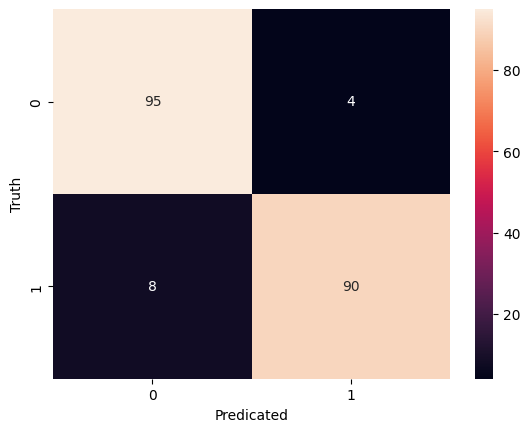

In [65]:
sns.heatmap(cm,annot=True)
plt.xlabel("Predicated")
plt.ylabel("Truth")
plt.show()

In [60]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [61]:
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(logi,x,y,cv=cv)

C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

array([0.93401015, 0.88324873, 0.94416244, 0.88832487, 0.93908629])

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


def find_best_model_using_gridseachcv(x,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False],
            }
        },
        'lasso':{
            'model':Lasso(),
             'params':{
                 'alpha':[1,2],
                 'selection':['random','cyclic']
             }
    },
    'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
    

In [63]:
find_best_model_using_gridseachcv(x,y)

C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

,model,best_score,best_params
0,linear_regression,0.611764,{'fit_intercept': True}
1,lasso,0.355763,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.561373,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [169]:
input_data = np.array([0, -1.359807134, -0.072781173, 2.536346738, 1.378155224, -0.33832077, 0.462387778, 0.239598554, 0.098697901, 0.36378697, 0.090794172, -0.551599533, -0.617800856, -0.991389847, -0.311169354, 1.468176972, -0.470400525, 0.207971242, 0.02579058, 0.40399296, 0.251412098, -0.018306778, 0.277837576, -0.11047391, 0.066928075, 0.128539358, -0.189114844, 0.133558377, -0.021053053, 149.62])

In [170]:
# Reshape the input data to a 2D array with a single row
reshaped_data = input_data.reshape(1, -1)

In [171]:
prediction = logi.predict(reshaped_data)

C:\Users\visha\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [172]:
prediction

array([0], dtype=int64)

In [174]:
# logi.predict([0,-1.359807134,	-0.072781173,	2.536346738,	1.378155224,	-0.33832077,	0.462387778,	0.239598554,	0.098697901,	0.36378697,	0.090794172,	-0.551599533,	-0.617800856,	-0.991389847,	-0.311169354,	1.468176972,	-0.470400525,	0.207971242,	0.02579058,	0.40399296,	0.251412098,	-0.018306778,	0.277837576,	-0.11047391,	0.066928075,	0.128539358,	-0.189114844,	0.133558377,	-0.021053053,	149.62])


In [165]:
x_test


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
247995,153761.0,1.146259,1.403458,-4.159148,2.660107,-0.323217,-1.836071,-1.623740,0.259562,-1.132044,...,0.284831,0.564450,0.445744,-0.141136,-0.265517,0.362260,-0.416062,0.507370,0.243744,51.37
140472,83744.0,-1.848834,2.000404,0.318658,1.446982,-1.077866,-0.150041,-0.259900,1.184405,-0.718599,...,-0.257374,0.153310,0.340568,0.005139,0.445444,-0.086006,-0.277341,-0.313289,-0.007454,48.56
155885,106704.0,-6.673753,4.165329,-3.667592,-1.186020,-1.235823,-0.756430,0.842106,0.560332,5.151145,...,1.892462,-0.824138,0.912271,-0.628732,-0.518583,0.002785,-0.501129,-0.519014,-1.290570,99.99
115546,73905.0,-0.801655,1.378684,0.641833,-0.324040,0.691111,0.010191,0.590762,0.126814,-0.004214,...,0.381701,-0.363052,-0.772941,-0.104283,-0.980079,0.016120,0.172438,0.482019,0.210935,5.25
15451,26833.0,-20.532751,12.373989,-23.009003,6.144821,-15.587296,-4.384491,-15.939003,13.696416,-3.948455,...,1.592754,1.754608,-1.466115,-0.856779,0.125777,1.402587,-0.223755,1.574249,0.469201,99.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108258,70828.0,0.196707,1.189757,0.704882,2.891388,0.045555,1.245730,-1.198714,-2.421616,-1.232089,...,0.646616,-1.328132,0.189311,-0.005524,-0.814708,0.400924,0.286281,0.135215,0.257315,0.76
12108,21046.0,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,0.996745,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.00
99506,67150.0,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,...,1.503688,0.838760,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,489.71
74496,55614.0,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,...,0.073164,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,0.83


In [175]:
import pickle
with open('Creadit_card_fraud_detaction.pkl','wb') as f:
    pickle.dump(logi,f)